In [ ]:
# # !pip install category_encoders
# !pip install graphviz

# #!pip install numpy --upgrade
# !pip install seaborn


# ! --upgrade
# # !pip3 install plotnine
# !pip install shap
# !pip install pyside2
# # !conda uninstall matplotlib --yes
# #!pip install matplotlib

In [ ]:
# !pip install matplotlib==3.1.1 #3.5.2

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/Users/yun/Downloads/transactions_train.csv')

In [ ]:
# Data Processing

In [ ]:
# 데이터 충분히 확보
df.shape

(6351193, 10)

In [ ]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0


In [ ]:
# Author : https://www.kaggle.com/gemartin/load-data-reduce-memory-usage
# def reduce_mem_usage(df):
#     """ iterate through all the columns of a dataframe and modify the data type
#         to reduce memory usage.        
#     """
#     start_mem = df.memory_usage().sum() / 1024**2
#     print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
#     for col in df.columns:
#         col_type = df[col].dtype
#         name =df[col].dtype.name 
        
#         if col_type != object and col_type.name != 'category':
#         #if name != "category":    
#             c_min = df[col].min()
#             c_max = df[col].max()
#             if str(col_type)[:3] == 'int':
#                 if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
#                     df[col] = df[col].astype(np.int8)
#                 elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
#                     df[col] = df[col].astype(np.int16)
#                 elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
#                     df[col] = df[col].astype(np.int32)
#                 elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
#                     df[col] = df[col].astype(np.int64)  
#             else:
#                 if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
#                     df[col] = df[col].astype(np.float16)
#                 elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
#                     df[col] = df[col].astype(np.float32)
#                 else:
#                     df[col] = df[col].astype(np.float64)
#         else:
#             df[col] = df[col].astype('category')

#     end_mem = df.memory_usage().sum() / 1024**2
#     print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
#     print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
#     return df


# def import_data(file):
#     """create a dataframe and optimize its memory usage"""
#     df = pd.read_csv(file, parse_dates=True, keep_date_col=True)
#     df = reduce_mem_usage(df)
#     return df


# print('-' * 80)
# print('df')
# df = import_data('/Users/yun/Downloads/transactions_train.csv')

#== 결과값 ==
# (5.8 MB) 큰 감소량을 보이지 않아서 적용하지 않기로 함.
# object 타입을 category 타입으로 변환하는 것이 오히려 번거로움.
# df
# Memory usage of dataframe is 484.56 MB
# Memory usage after optimization is: 456.44 MB
# Decreased by 5.8%

In [ ]:
# 중복 데이터 확인
df.duplicated().sum()

0

In [ ]:
# 중복되는 거래인은 많다.
df.nameOrig.duplicated().sum()

9286

In [ ]:
# 결측치 확인
df.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrig    0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
dtype: int64

In [ ]:
# # 각 피쳐 설명
# step: 실제 세계에서 시간 단위를 매핑합니다. 이 경우 1스텝은 1시간입니다.

# type: 현금 인, 현금 인출, 빚갚음, 지불 및 이체

# amount: 현지 통화로 거래 금액

# nameOrig: 거래를 시작한 고객

# oldbalanceOrig: 거래 전 초기 잔액

# newbalanceOrig: 거래 후 고객의 잔액.

# nameDest: 트랜잭션의 수신자 ID입니다.

# oldbalanceDest: 거래 전 초기 수취인 잔액.

# newbalanceDest: 거래 후 수취인의 잔액.

# isFraud: 사기여부

In [ ]:
# [거래 후 잔액 - 거래 전 잔액] 으로 고객과 수취인의 거래금액 피쳐생성 가능
# 조금 씩 여러번의 수법? 한 번에 큰 금액 수법?
# 행동패턴 파악 -> 사전 사기 예방
# 한 번 사기를 치면 또 사기를 칠 것이다? 따라서 거래를 금지시켜야 한다?
# 한 탕 치는 사람들이 많을 것. 거래되는 금액 75% 이상 확인?
# 사기가 이루어지는 시간대는 일반 거래가 이루어지는 시간에 이뤄지지 않을 것이다.

In [ ]:
# 최빈값
df.isFraud.mode()[0]

0

In [ ]:
# 타겟 비율 확인: 극도의 불균형
# 오히려 좋아. 여러 기법들을 사용해보자.
df.isFraud.value_counts(normalize=True)

0    0.998785
1    0.001215
Name: isFraud, dtype: float64

In [ ]:
# 타겟 비율 확인 (파이챠트)
import matplotlib.pyplot as plt

def analysis_on_target(df):

    n_zero_label = len(df[df['isFraud'] == 0])
    n_one_label = len(df[df['isFraud'] == 1])

    plt.pie(
        (n_zero_label, n_one_label),
        labels=(0, 1),
        autopct="%.2f%%",
        shadow=True,
        startangle=90,
    )
    plt.title("Target: isFraud", size=15)
    plt.show()

    return n_zero_label, n_one_label

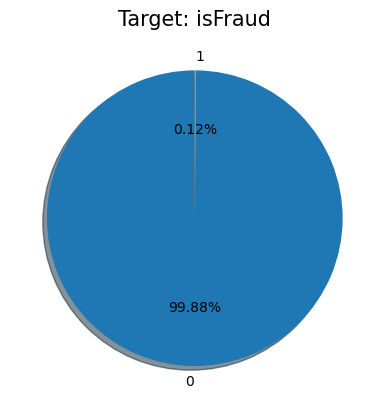

(6343476, 7717)

In [ ]:
# 극단적인 target의 분포
analysis_on_target(df)

In [ ]:
# 실수표현
pd.options.display.float_format = '{:.5f}'.format

df.describe().T

,count,mean,std,min,25%,50%,75%,max
step,6351193.00000,242.55530,141.06764,1.00000,155.00000,238.00000,334.00000,699.00000
amount,6351193.00000,179815.53596,603630.97744,0.00000,13388.29000,74864.83000,208715.19000,92445516.64000
oldbalanceOrig,6351193.00000,834795.68404,2889959.09417,0.00000,0.00000,14153.00000,107346.00000,59585040.37000
newbalanceOrig,6351193.00000,856169.58283,2926073.05954,0.00000,0.00000,0.00000,144365.15000,49585040.37000
oldbalanceDest,6351193.00000,1101042.59699,3398923.57320,0.00000,0.00000,133086.55000,943866.12000,356015889.35000
newbalanceDest,6351193.00000,1225371.97369,3674292.58713,0.00000,0.00000,214919.01000,1112791.08000,356179278.92000
isFraud,6351193.00000,0.00122,0.03484,0.00000,0.00000,0.00000,0.00000,1.00000


In [ ]:
# 타입확인
# 특별히 수정해야할 부분은 확인되지 않는다.
df.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrig    float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
dtype: object

In [ ]:
# 카디널리티 확인..
df.nunique()

step                  699
type                    5
amount            5308896
nameOrig          6341907
oldbalanceOrig    1844245
newbalanceOrig    2677400
nameDest          2716810
oldbalanceDest    3609168
newbalanceDest    3549046
isFraud                 2
dtype: int64

In [ ]:
# 거래타입의 비율 확인
df['type'].value_counts(normalize=True)

CASH_OUT   0.35165
PAYMENT    0.33818
CASH_IN    0.21994
TRANSFER   0.08373
DEBIT      0.00650
Name: type, dtype: float64

<BarContainer object of 5 artists>

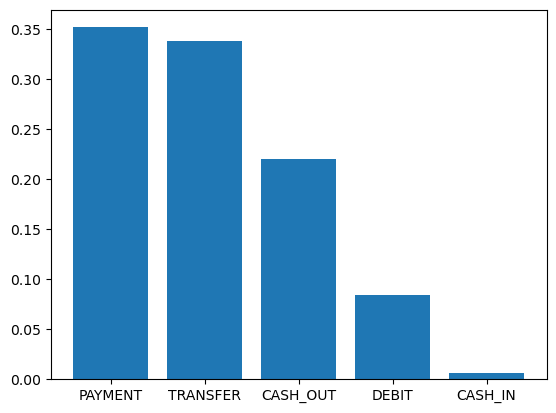

In [ ]:
# 파이챠트로 그리면 더 좋을 듯.
plt.bar(df.type.unique(), df['type'].value_counts(normalize=True))

([<matplotlib.patches.Wedge at 0x7fe37ee95640>,
 [Text(0.4943159702259587, 0.9826757967812015, 'CASH_OUT'),
  Text(-1.0906783480127538, -0.14290115876426782, 'PAYMENT'),
  Text(0.3385512153929755, -1.046605500919969, 'CASH_IN'),
  Text(1.0495848284415874, -0.3291985539233788, 'TRANSFER'),
  Text(1.0997703570802382, -0.0224758022683387, 'DEBIT')],
 [Text(0.2696268928505229, 0.5360049800624735, '35.16%'),
  Text(-0.5949154625524111, -0.07794608659869152, '33.82%'),
  Text(0.18466429930525935, -0.5708757277745284, '21.99%'),
  Text(0.5725008155135931, -0.17956284759457025, '8.37%'),
  Text(0.5998747402255844, -0.012259528510002926, '0.65%')])

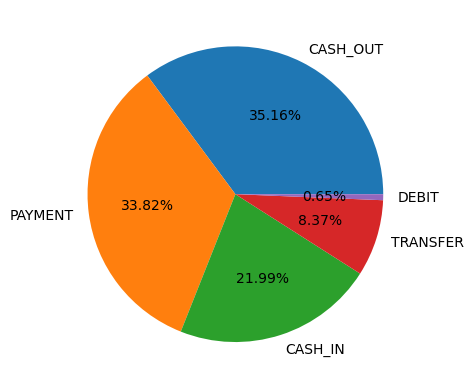

In [ ]:
labels=['CASH_OUT', 'PAYMENT', 'CASH_IN', 'TRANSFER', 'DEBIT']

plt.pie(df['type'].value_counts(normalize=True), autopct="%.2f%%", labels=labels)

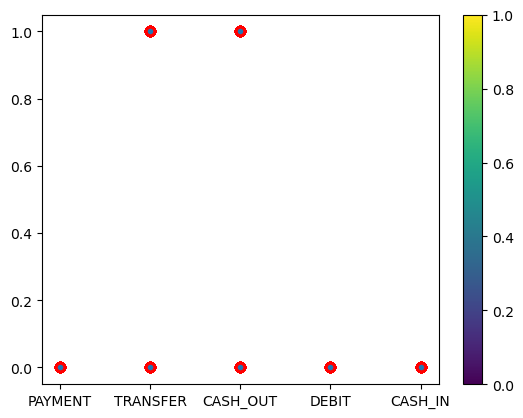

In [ ]:
# 거래타입과 타겟의 관계
# 이체와 인출을 주목. 나머지 타입은 삭제.
plt.scatter(df['type'], df['isFraud'], cmap='Greens', edgecolors='red', linewidth=2)
plt.colorbar()
plt.show()

In [ ]:
# 불필요한 rows 삭제
del_type = df[(df['type']=='PAYMENT') |(df['type']=='DEBIT') | (df['type']=='CASH_IN')].index
df.drop(index=del_type, axis=0, inplace=True)
df=df.reset_index(drop=True)

df

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,181.00000,C1305486145,181.00000,0.00000,C553264065,0.00000,0.00000,1
1,1,CASH_OUT,181.00000,C840083671,181.00000,0.00000,C38997010,21182.00000,0.00000,1
2,1,CASH_OUT,229133.94000,C905080434,15325.00000,0.00000,C476402209,5083.00000,51513.44000,0
3,1,TRANSFER,215310.30000,C1670993182,705.00000,0.00000,C1100439041,22425.00000,0.00000,0
4,1,TRANSFER,311685.89000,C1984094095,10835.00000,0.00000,C932583850,6267.00000,2719172.89000,0
...,...,...,...,...,...,...,...,...,...,...
2765181,699,CASH_OUT,62372.43000,C1915659563,62372.43000,0.00000,C421781202,1195387.47000,1257759.90000,1
2765182,699,TRANSFER,162326.52000,C1557504343,162326.52000,0.00000,C404511346,0.00000,0.00000,1
2765183,699,CASH_OUT,162326.52000,C1532317723,162326.52000,0.00000,C446134087,0.00000,162326.52000,1
2765184,699,TRANSFER,2763398.31000,C577803442,2763398.31000,0.00000,C619602282,0.00000,0.00000,1


In [ ]:
# 왜도 확인
skew = df.skew()
skew_df = pd.DataFrame({'skew': skew})
skew_df

,skew
step,0.33139
amount,21.97573
oldbalanceOrig,65.48193
newbalanceOrig,122.04790
oldbalanceDest,17.17091
newbalanceDest,16.44148
isFraud,18.85012


array([[<AxesSubplot:title={'center':'step'}>,
        <AxesSubplot:title={'center':'amount'}>,
        <AxesSubplot:title={'center':'oldbalanceOrig'}>],
       [<AxesSubplot:title={'center':'newbalanceOrig'}>,
        <AxesSubplot:title={'center':'oldbalanceDest'}>,
        <AxesSubplot:title={'center':'newbalanceDest'}>],
       [<AxesSubplot:title={'center':'isFraud'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

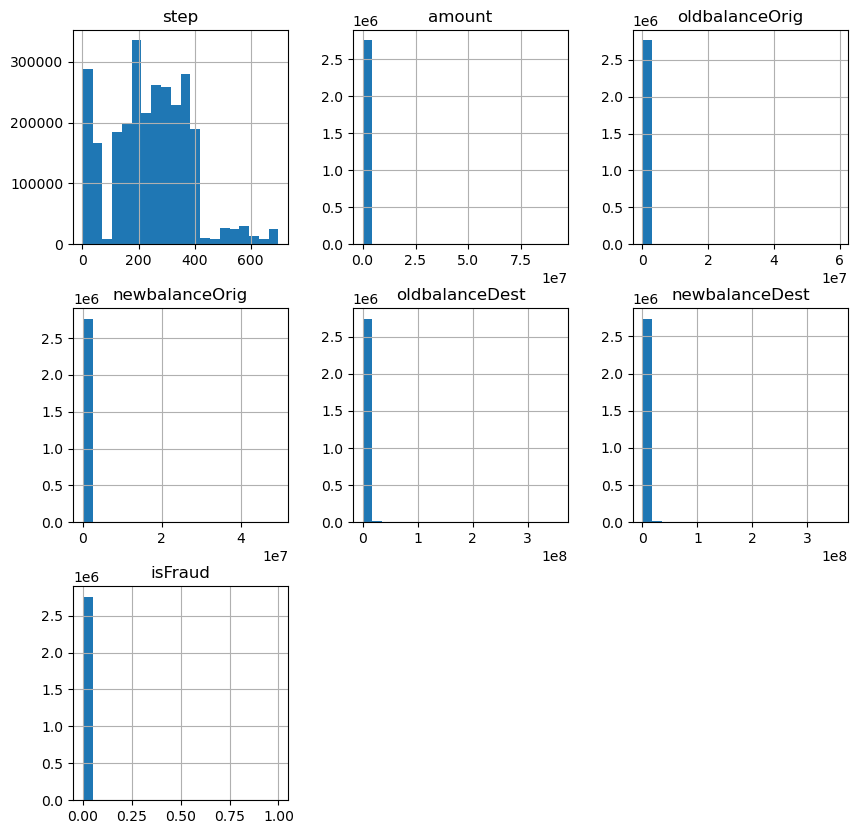

In [ ]:
# step 피쳐 이외의 피쳐들이 극도로 오른쪽 꼬리가 김을 알 수 있다. (isFraud 열외)
# https://www.inflearn.com/questions/89548/%EB%A1%9C%EA%B7%B8-%EB%B3%80%ED%99%98-%EA%B4%80%EB%A0%A8-%EC%A7%88%EB%AC%B8%EB%93%9C%EB%A6%BD%EB%8B%88%EB%8B%A4
# 데이터셋을 나누기 전에(train, val, test) 모두 로그변환 진행
df.hist(bins=20, figsize=(10,10))

In [ ]:
# 실수형 데이터들 추출
df_num = df.select_dtypes(include=['float'])
df_num

,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest
0,181.00000,181.00000,0.00000,0.00000,0.00000
1,181.00000,181.00000,0.00000,21182.00000,0.00000
2,229133.94000,15325.00000,0.00000,5083.00000,51513.44000
3,215310.30000,705.00000,0.00000,22425.00000,0.00000
4,311685.89000,10835.00000,0.00000,6267.00000,2719172.89000
...,...,...,...,...,...
2765181,62372.43000,62372.43000,0.00000,1195387.47000,1257759.90000
2765182,162326.52000,162326.52000,0.00000,0.00000,0.00000
2765183,162326.52000,162326.52000,0.00000,0.00000,162326.52000
2765184,2763398.31000,2763398.31000,0.00000,0.00000,0.00000


In [ ]:
# df_int에 대해서 로그변환 진행
# 0.0이상인 값들은 NaN이 되어버린다.
log_df = np.log1p(df_num[df_num > 0.0])
log_df

,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest
0,5.20401,5.20401,NaN,NaN,NaN
1,5.20401,5.20401,NaN,9.96095,NaN
2,12.34207,9.63731,NaN,8.53385,10.84962
3,12.27984,6.55962,NaN,10.01798,NaN
4,12.64975,9.29063,NaN,8.74321,14.81584
...,...,...,...,...,...
2765181,11.04089,11.04089,NaN,13.99398,14.04484
2765182,11.99737,11.99737,NaN,NaN,NaN
2765183,11.99737,11.99737,NaN,NaN,11.99737
2765184,14.83197,14.83197,NaN,NaN,NaN


array([[<AxesSubplot:title={'center':'amount'}>,
        <AxesSubplot:title={'center':'oldbalanceOrig'}>],
       [<AxesSubplot:title={'center':'newbalanceOrig'}>,
        <AxesSubplot:title={'center':'oldbalanceDest'}>],
       [<AxesSubplot:title={'center':'newbalanceDest'}>, <AxesSubplot:>]],
      dtype=object)

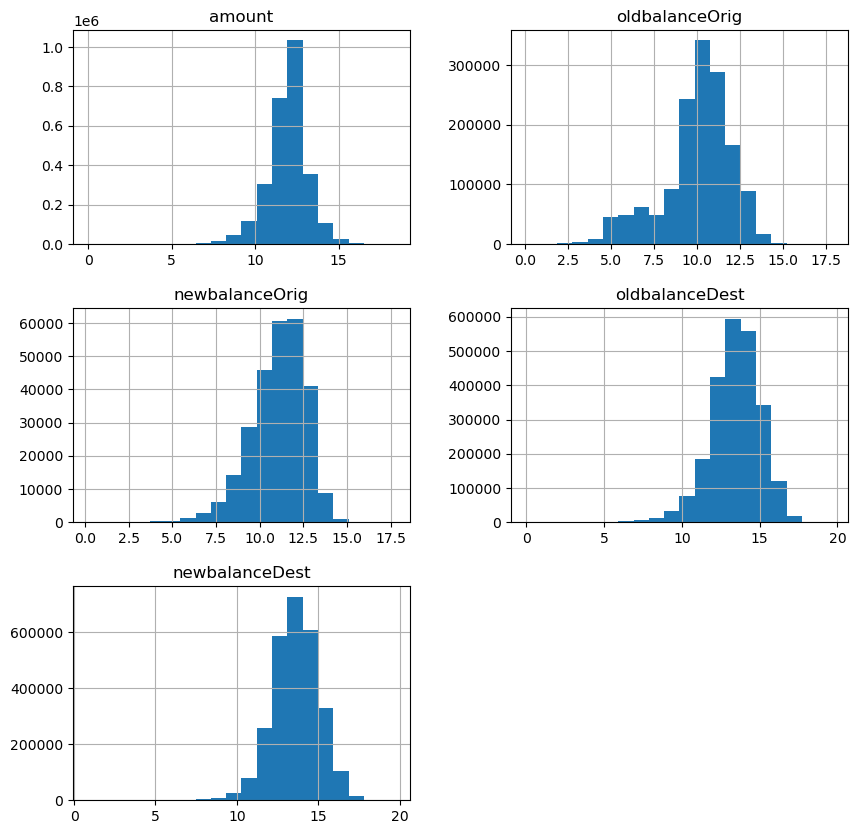

In [ ]:
# https://brain-nim.tistory.com/22
# 왼쪽꼬리가 길어졌음이 확인되지만 이전보다 정규분포에 가까워졌음을 확인.
log_df.hist(bins=20, figsize=(10,10))

In [ ]:
# 로그변환 이후 결측치가 많아짐을 확인.
log_df.isnull().sum()

amount                 12
oldbalanceOrig    1308085
newbalanceOrig    2492130
oldbalanceDest     387692
newbalanceDest      16350
dtype: int64

In [ ]:
# 로그변환한 데이터를 기존 데이터(df)와 동일한 형태로 변환하기
log_df[['step', 'type', 'nameOrig', 'nameDest', 'isFraud']] = df[['step', 'type', 'nameOrig', 'nameDest', 'isFraud']]

log_df = log_df[['step', 'type', 'amount', 'nameOrig', 'oldbalanceOrig', 
                'newbalanceOrig', 'nameDest', 'oldbalanceDest', 'newbalanceDest', 'isFraud']]

log_df

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,5.20401,C1305486145,5.20401,NaN,C553264065,NaN,NaN,1
1,1,CASH_OUT,5.20401,C840083671,5.20401,NaN,C38997010,9.96095,NaN,1
2,1,CASH_OUT,12.34207,C905080434,9.63731,NaN,C476402209,8.53385,10.84962,0
3,1,TRANSFER,12.27984,C1670993182,6.55962,NaN,C1100439041,10.01798,NaN,0
4,1,TRANSFER,12.64975,C1984094095,9.29063,NaN,C932583850,8.74321,14.81584,0
...,...,...,...,...,...,...,...,...,...,...
2765181,699,CASH_OUT,11.04089,C1915659563,11.04089,NaN,C421781202,13.99398,14.04484,1
2765182,699,TRANSFER,11.99737,C1557504343,11.99737,NaN,C404511346,NaN,NaN,1
2765183,699,CASH_OUT,11.99737,C1532317723,11.99737,NaN,C446134087,NaN,11.99737,1
2765184,699,TRANSFER,14.83197,C577803442,14.83197,NaN,C619602282,NaN,NaN,1


In [ ]:
# 결측값은 0으로 대체
log_df=log_df.fillna(0.0)
log_df

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
0,1,TRANSFER,5.20401,C1305486145,5.20401,0.00000,C553264065,0.00000,0.00000,1
1,1,CASH_OUT,5.20401,C840083671,5.20401,0.00000,C38997010,9.96095,0.00000,1
2,1,CASH_OUT,12.34207,C905080434,9.63731,0.00000,C476402209,8.53385,10.84962,0
3,1,TRANSFER,12.27984,C1670993182,6.55962,0.00000,C1100439041,10.01798,0.00000,0
4,1,TRANSFER,12.64975,C1984094095,9.29063,0.00000,C932583850,8.74321,14.81584,0
...,...,...,...,...,...,...,...,...,...,...
2765181,699,CASH_OUT,11.04089,C1915659563,11.04089,0.00000,C421781202,13.99398,14.04484,1
2765182,699,TRANSFER,11.99737,C1557504343,11.99737,0.00000,C404511346,0.00000,0.00000,1
2765183,699,CASH_OUT,11.99737,C1532317723,11.99737,0.00000,C446134087,0.00000,11.99737,1
2765184,699,TRANSFER,14.83197,C577803442,14.83197,0.00000,C619602282,0.00000,0.00000,1


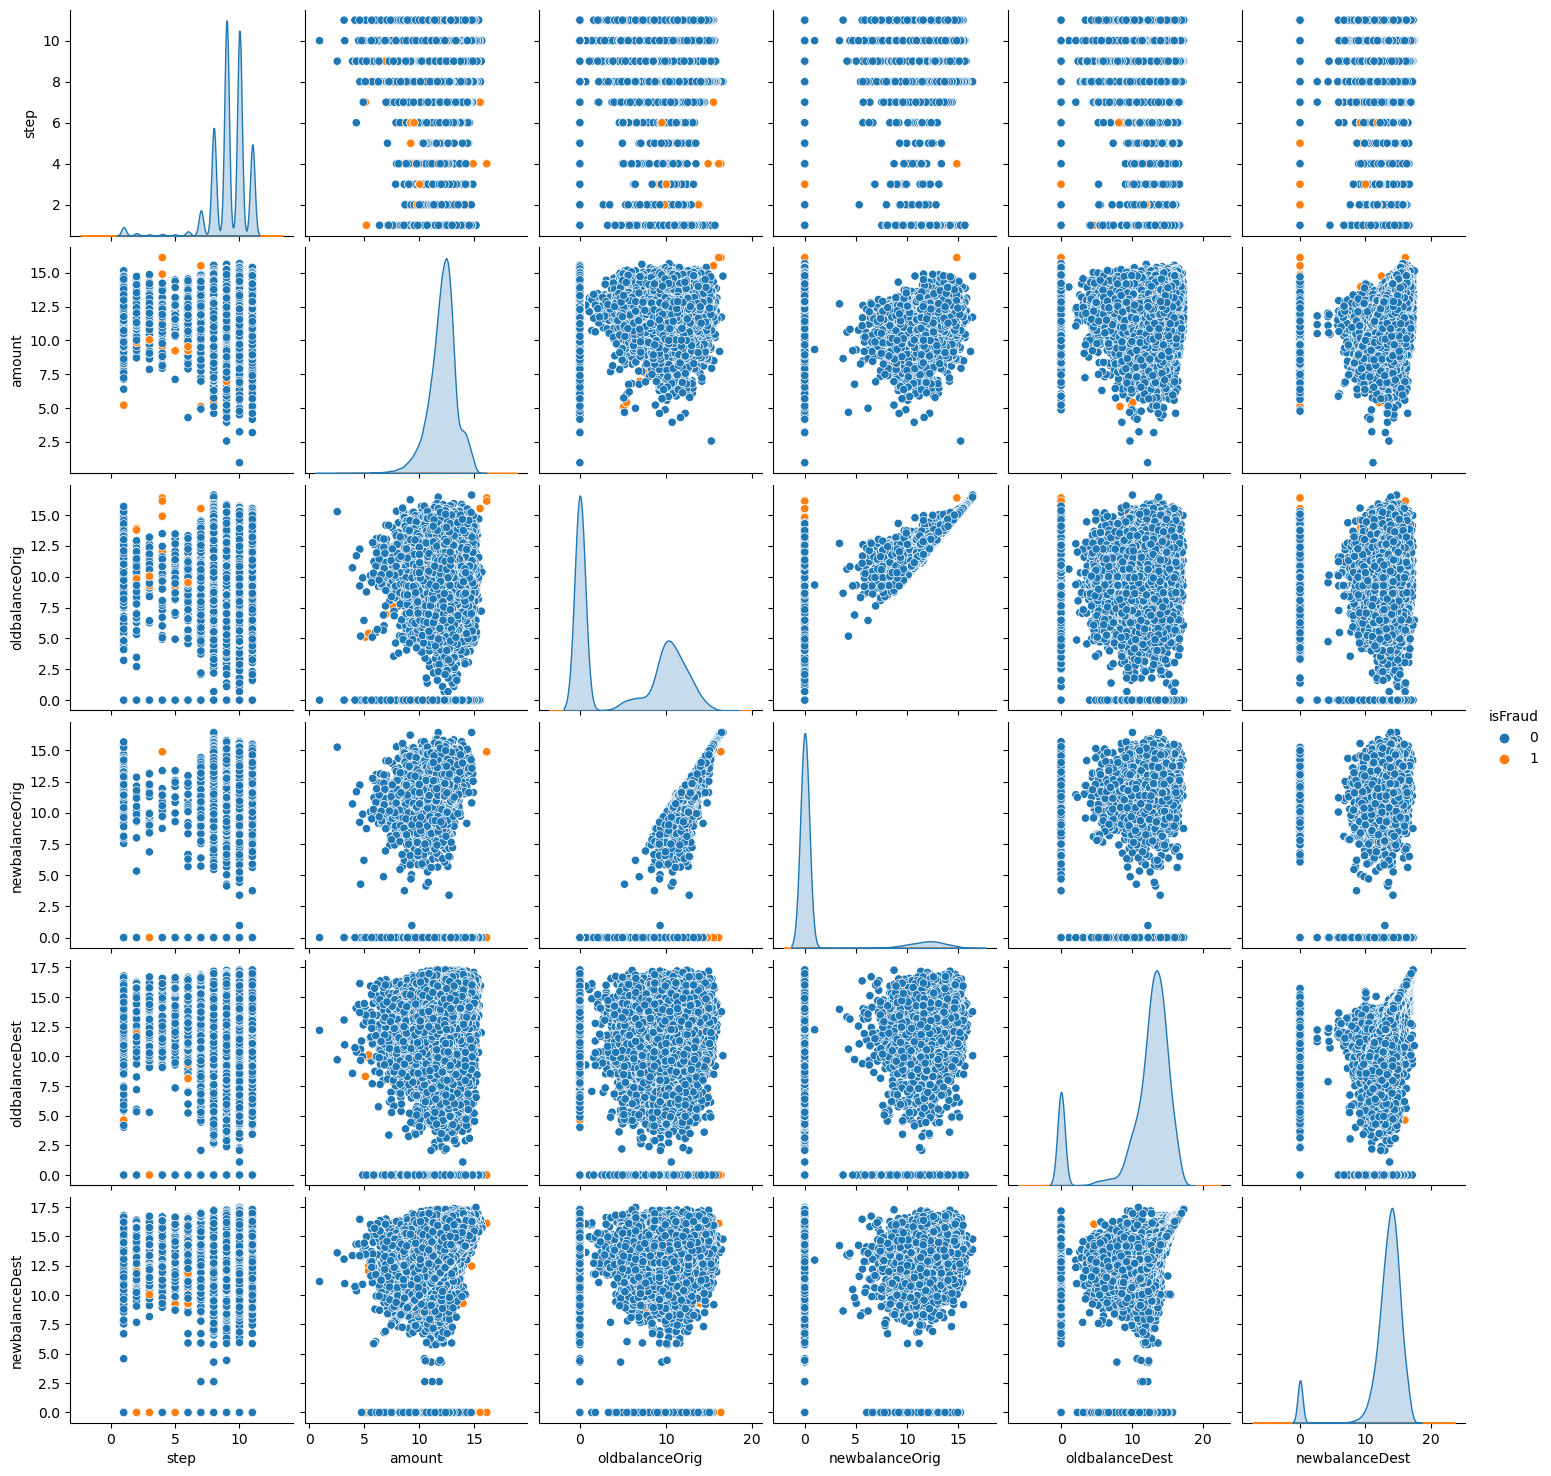

In [ ]:
# 방대한 양의 데이터로 인해서 5만개만..
sns.pairplot(log_df.iloc[0:50000], hue='isFraud')

In [ ]:
# 거래시간과 타겟의 관계 확인

# 사기 데이터 추출
inFraud = pd.Series(df[df['isFraud']==1].step)

# 비사기 데이터 추출
NotinFraud = df[df['isFraud']==0].step

In [ ]:
chk_step = pd.DataFrame()
dummy = pd.DataFrame()

chk_step['NotinFraud']= NotinFraud
chk_step= chk_step.reset_index(drop=True)

dummy['inFraud']= inFraud
dummy = dummy.reset_index(drop=True)
dummy

chk_step['inFraud'] = dummy['inFraud']
chk_step

,NotinFraud,inFraud
0,1,1.00000
1,1,1.00000
2,1,1.00000
3,1,1.00000
4,1,1.00000
...,...,...
2757464,699,NaN
2757465,699,NaN
2757466,699,NaN
2757467,699,NaN


<BarContainer object of 699 artists>

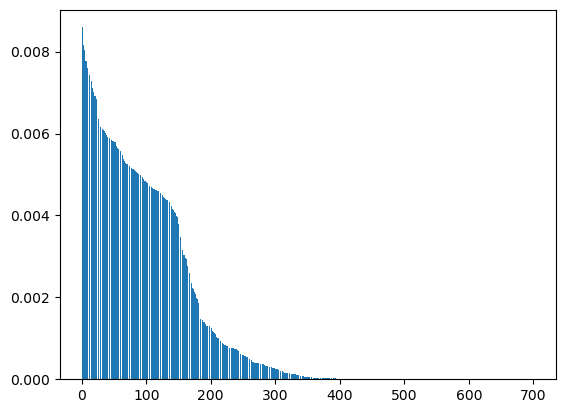

In [ ]:
# 거래가 이루어진 시간의 비율 (전체거래)
plt.bar(df.step.unique(), df['step'].value_counts(normalize=True))

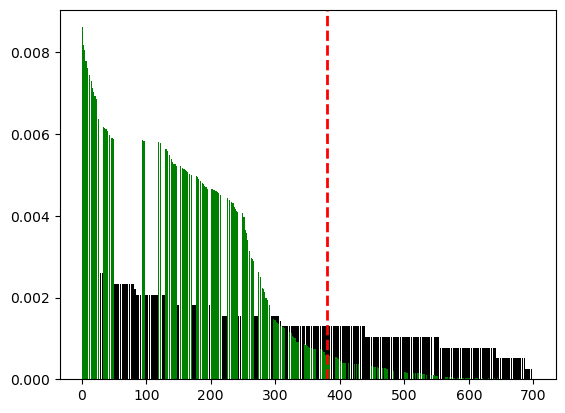

In [ ]:
# 가설 검정 완료.
# 사기거래는 정상거래가 이루어지지 않는 시간에 제법 이루어진다.
plt.bar(dummy['inFraud'].unique(), dummy['inFraud'].value_counts(normalize=True), color='black')
plt.bar(chk_step['NotinFraud'].unique(), chk_step['NotinFraud'].value_counts(normalize=True), color='green')

plt.axvline(x=380, color='red', linestyle='--', linewidth=2)

In [ ]:
def get_step(x):
    if x <= 380:
        step=True
    else:
        step=False
    return step

log_df['isUsllStep'] = log_df['step'].apply(lambda x: get_step(x))
log_df['isUsllStep']

0           True
1           True
2           True
3           True
4           True
           ...  
2765181    False
2765182    False
2765183    False
2765184    False
2765185    False
Name: isUsllStep, Length: 2765186, dtype: bool

In [ ]:
log_df_num = log_df.select_dtypes(include='float')
log_df_num

,amount,oldbalanceOrig,newbalanceOrig,oldbalanceDest,newbalanceDest
0,5.20401,5.20401,0.00000,0.00000,0.00000
1,5.20401,5.20401,0.00000,9.96095,0.00000
2,12.34207,9.63731,0.00000,8.53385,10.84962
3,12.27984,6.55962,0.00000,10.01798,0.00000
4,12.64975,9.29063,0.00000,8.74321,14.81584
...,...,...,...,...,...
2765181,11.04089,11.04089,0.00000,13.99398,14.04484
2765182,11.99737,11.99737,0.00000,0.00000,0.00000
2765183,11.99737,11.99737,0.00000,0.00000,11.99737
2765184,14.83197,14.83197,0.00000,0.00000,0.00000


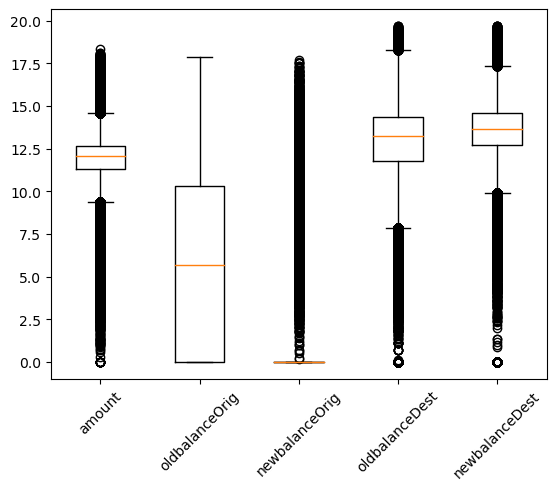

In [ ]:
# 이상치 식별
plt.boxplot(log_df_num)
plt.xticks([1, 2, 3, 4, 5], ['amount', 'oldbalanceOrig', 'newbalanceOrig', 
                             'oldbalanceDest', 'newbalanceDest'], rotation=45)
plt.show()

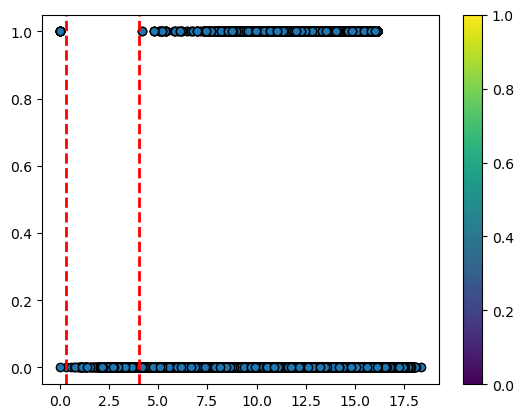

In [ ]:
# 거래금액과 타겟의 관계
# amount값이 0.3초과 4.0미만인 행 삭제 감행.
# 극단적 불균형이기에 양해 바랍니다.
plt.scatter(log_df['amount'], log_df['isFraud'], cmap='Greens', edgecolors='black', linewidth=1)
plt.colorbar()
plt.axvline(x=4.0, color='red', linestyle='--', linewidth=2)
plt.axvline(x=0.3, color='red', linestyle='--', linewidth=2)
plt.show()

In [ ]:
# 삭제
del_amt = log_df[(log_df['amount'] < 4.0) & (log_df['amount'] > 0.3)]
log_df.drop(index=del_amt.index, inplace=True, axis=0)
log_df=log_df.reset_index(drop=True)

log_df

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isUsllStep
0,1,TRANSFER,5.20401,C1305486145,5.20401,0.00000,C553264065,0.00000,0.00000,1,True
1,1,CASH_OUT,5.20401,C840083671,5.20401,0.00000,C38997010,9.96095,0.00000,1,True
2,1,CASH_OUT,12.34207,C905080434,9.63731,0.00000,C476402209,8.53385,10.84962,0,True
3,1,TRANSFER,12.27984,C1670993182,6.55962,0.00000,C1100439041,10.01798,0.00000,0,True
4,1,TRANSFER,12.64975,C1984094095,9.29063,0.00000,C932583850,8.74321,14.81584,0,True
...,...,...,...,...,...,...,...,...,...,...,...
2764776,699,CASH_OUT,11.04089,C1915659563,11.04089,0.00000,C421781202,13.99398,14.04484,1,False
2764777,699,TRANSFER,11.99737,C1557504343,11.99737,0.00000,C404511346,0.00000,0.00000,1,False
2764778,699,CASH_OUT,11.99737,C1532317723,11.99737,0.00000,C446134087,0.00000,11.99737,1,False
2764779,699,TRANSFER,14.83197,C577803442,14.83197,0.00000,C619602282,0.00000,0.00000,1,False


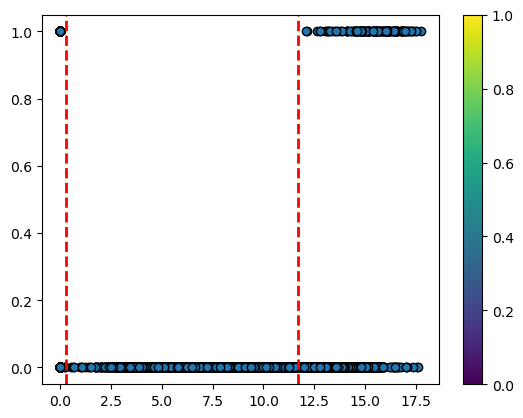

In [ ]:
# 거래인의 거래 후 금액(newbalanceOrig)과 타겟의 관계
# newbalanceOrig값이 11.7미만 0.3초과인 행 삭제 감행.
plt.scatter(log_df['newbalanceOrig'], log_df['isFraud'], cmap='Greens', edgecolors='black', linewidth=1)
plt.colorbar()
plt.axvline(x=11.7, color='red', linestyle='--', linewidth=2)
plt.axvline(x=0.3, color='red', linestyle='--', linewidth=2)
plt.show()

In [ ]:
# 삭제
del_nbo = log_df[(log_df['newbalanceOrig'] < 11.7) & (log_df['newbalanceOrig'] > 0.3)]
log_df.drop(index=del_nbo.index, inplace=True, axis=0)
log_df=log_df.reset_index(drop=True)

log_df

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isUsllStep
0,1,TRANSFER,5.20401,C1305486145,5.20401,0.00000,C553264065,0.00000,0.00000,1,True
1,1,CASH_OUT,5.20401,C840083671,5.20401,0.00000,C38997010,9.96095,0.00000,1,True
2,1,CASH_OUT,12.34207,C905080434,9.63731,0.00000,C476402209,8.53385,10.84962,0,True
3,1,TRANSFER,12.27984,C1670993182,6.55962,0.00000,C1100439041,10.01798,0.00000,0,True
4,1,TRANSFER,12.64975,C1984094095,9.29063,0.00000,C932583850,8.74321,14.81584,0,True
...,...,...,...,...,...,...,...,...,...,...,...
2596264,699,CASH_OUT,11.04089,C1915659563,11.04089,0.00000,C421781202,13.99398,14.04484,1,False
2596265,699,TRANSFER,11.99737,C1557504343,11.99737,0.00000,C404511346,0.00000,0.00000,1,False
2596266,699,CASH_OUT,11.99737,C1532317723,11.99737,0.00000,C446134087,0.00000,11.99737,1,False
2596267,699,TRANSFER,14.83197,C577803442,14.83197,0.00000,C619602282,0.00000,0.00000,1,False


In [ ]:
plt.hist(log_df.new_amount)

AttributeError: 'DataFrame' object has no attribute 'new_amount'

In [ ]:
log_df.shape

In [ ]:
# 여전히 불균형이지만 target의 비율이 0.12 -> 0.30로 증가했다. 
analysis_on_target(log_df)

In [ ]:
# #출처 - 파이썬을 이용한 머신러닝, 딥러닝 실전 개발 입문
# def get_outlier(df=None,column=None,weight=1.5):
#     '''인자로 Dataframe과 이상치를 검출할 칼럼을 입력받는다. 
#     iqr에 1.5 곱해서 이에 기반하여 이상치를 구해 해당 이상치가 있는 index 반환
#     '''
    
#     column_x = df[column]
#     # 1/4 분위와 3/4 분위 지점을 np.percentile로 구함
#     quantile_25 = np.percentile(column_x.values,25)
#     quantile_75 = np.percentile(column_x.values,75)
    
#     # IQR을 구하고 IQR에 1.5를 곱해 최댓값과 최솟값 지점 구함.
#     iqr = quantile_75 - quantile_25
#     iqr_weight = iqr * weight
#     lowest_val = quantile_25 - iqr_weight
#     highest_val = quantile_75 + iqr_weight
    
#     # 최댓값보다 크거나, 최솟값보다 작은 값을 이상치 데이터로 설정하고 Dataframe index 반환
#     outlier_index = column_x[(column_x < lowest_val) | (column_x > highest_val)].index
#     return outlier_index

# a = get_outlier(log_df, 'newbalanceOrig')
# a

In [ ]:
####################### Feature Enginnering #######################

In [ ]:
log_df.columns

In [ ]:
# 거래인의 거래금액(차액)
# 정확한 계산을 위해서 소수점을 절삭한 새로운 거래금액(new_amount) 컬럼 생성
log_df['new_amount'] = round(log_df.amount)
log_df['transaction_amtOrig'] = round(log_df['newbalanceOrig']-log_df['oldbalanceOrig'])

log_df

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isUsllStep,new_amount,transaction_amtOrig
0,1,TRANSFER,5.20401,C1305486145,5.20401,0.00000,C553264065,0.00000,0.00000,1,True,5.00000,-5.00000
1,1,CASH_OUT,5.20401,C840083671,5.20401,0.00000,C38997010,9.96095,0.00000,1,True,5.00000,-5.00000
2,1,CASH_OUT,12.34207,C905080434,9.63731,0.00000,C476402209,8.53385,10.84962,0,True,12.00000,-10.00000
3,1,TRANSFER,12.27984,C1670993182,6.55962,0.00000,C1100439041,10.01798,0.00000,0,True,12.00000,-7.00000
4,1,TRANSFER,12.64975,C1984094095,9.29063,0.00000,C932583850,8.74321,14.81584,0,True,13.00000,-9.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2596264,699,CASH_OUT,11.04089,C1915659563,11.04089,0.00000,C421781202,13.99398,14.04484,1,False,11.00000,-11.00000
2596265,699,TRANSFER,11.99737,C1557504343,11.99737,0.00000,C404511346,0.00000,0.00000,1,False,12.00000,-12.00000
2596266,699,CASH_OUT,11.99737,C1532317723,11.99737,0.00000,C446134087,0.00000,11.99737,1,False,12.00000,-12.00000
2596267,699,TRANSFER,14.83197,C577803442,14.83197,0.00000,C619602282,0.00000,0.00000,1,False,15.00000,-15.00000


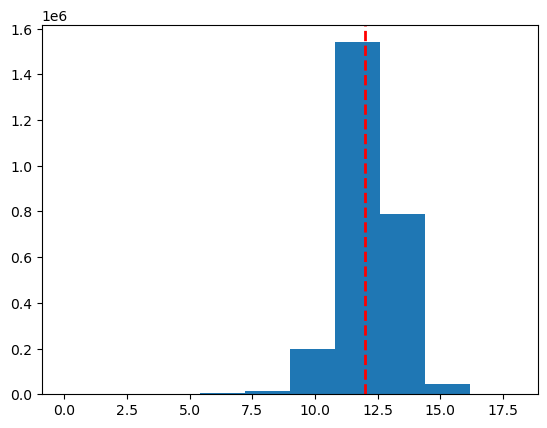

In [ ]:
# 거래액의 분포확인
plt.hist(log_df.new_amount)
plt.axvline(x=log_df.new_amount.mean(), color='red', linestyle='--', linewidth=2)

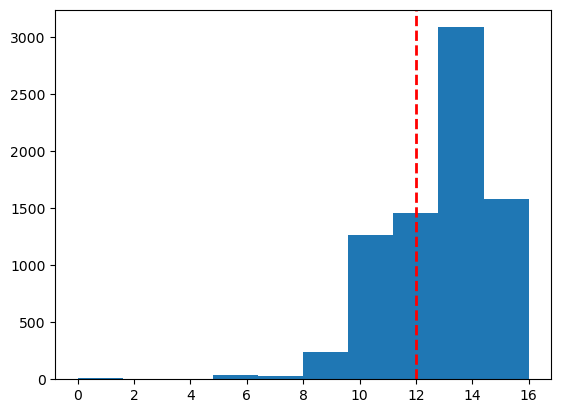

In [ ]:
# 사기거래 금액 분포 (빨간 색은 전체 거래액의 평균)
plt.hist(log_df[log_df['isFraud']==1].new_amount)
plt.axvline(x=log_df.new_amount.mean(), color='red', linestyle='--', linewidth=2)

In [ ]:
# 수취인의 거래금액 (차액)
log_df['transaction_amtDest'] = round(log_df['newbalanceDest']-log_df['oldbalanceDest'])
log_df['transaction_amtDest']

0           0.00000
1         -10.00000
2           2.00000
3         -10.00000
4           6.00000
             ...   
2596264     0.00000
2596265     0.00000
2596266    12.00000
2596267     0.00000
2596268     2.00000
Name: transaction_amtDest, Length: 2596269, dtype: float64

In [ ]:
# 거래인이 이체를 했으나, 수취인의 거래금액이 이체금액만큼 변동하지 않았을 경우 사기 의심? 
# 수취인이 M으로 시작할 경우 보통 PAYMENT(지불)이 진행되었으며 수취인의 계좌금액은 변하지 않는다.

In [ ]:
log_df.head()

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isUsllStep,new_amount,transaction_amtOrig,transaction_amtDest
0,1,TRANSFER,5.20401,C1305486145,5.20401,0.00000,C553264065,0.00000,0.00000,1,True,5.00000,-5.00000,0.00000
1,1,CASH_OUT,5.20401,C840083671,5.20401,0.00000,C38997010,9.96095,0.00000,1,True,5.00000,-5.00000,-10.00000
2,1,CASH_OUT,12.34207,C905080434,9.63731,0.00000,C476402209,8.53385,10.84962,0,True,12.00000,-10.00000,2.00000
3,1,TRANSFER,12.27984,C1670993182,6.55962,0.00000,C1100439041,10.01798,0.00000,0,True,12.00000,-7.00000,-10.00000
4,1,TRANSFER,12.64975,C1984094095,9.29063,0.00000,C932583850,8.74321,14.81584,0,True,13.00000,-9.00000,6.00000


In [ ]:
# isSameAmt2Orig: 거래인의 거래금액의 절대값(transaction_amtOrig)이 거래액(amount)과 동일한가?
# isSameAmt2Dest: 수취인의 거래금액의 절대값(transaction_amtDest)이 거래액(amount)과 동일한가?
# train.amount == abs(train.transaction_amtOrig) 

# 왜인지 두 값이 동일해도 False를 반환. 소숫점 절삭.
log_df['isSameAmt2Orig'] = log_df['new_amount'] == abs(log_df.transaction_amtOrig)
log_df['isSameAmt2Dest'] = log_df['new_amount'] == abs(log_df.transaction_amtDest)

In [ ]:
# 재정렬
log_df[['amount', 'new_amount', 'transaction_amtOrig', 'transaction_amtDest', 'isSameAmt2Orig', 'isSameAmt2Dest']]

,amount,new_amount,transaction_amtOrig,transaction_amtDest,isSameAmt2Orig,isSameAmt2Dest
0,5.20401,5.00000,-5.00000,0.00000,True,False
1,5.20401,5.00000,-5.00000,-10.00000,True,False
2,12.34207,12.00000,-10.00000,2.00000,False,False
3,12.27984,12.00000,-7.00000,-10.00000,False,False
4,12.64975,13.00000,-9.00000,6.00000,False,False
...,...,...,...,...,...,...
2596264,11.04089,11.00000,-11.00000,0.00000,True,False
2596265,11.99737,12.00000,-12.00000,0.00000,True,False
2596266,11.99737,12.00000,-12.00000,12.00000,True,True
2596267,14.83197,15.00000,-15.00000,0.00000,True,False


In [ ]:
# 거래인의 거래금액의 절대값(transaction_amtOrig)과 수취인의 거래금액의 절대값(train.transaction_amtDest)이 동일한가?
log_df['isSameAmtOrig2Dest'] = abs(log_df.transaction_amtOrig) == abs(log_df.transaction_amtDest)
log_df

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isUsllStep,new_amount,transaction_amtOrig,transaction_amtDest,isSameAmt2Orig,isSameAmt2Dest,isSameAmtOrig2Dest
0,1,TRANSFER,5.20401,C1305486145,5.20401,0.00000,C553264065,0.00000,0.00000,1,True,5.00000,-5.00000,0.00000,True,False,False
1,1,CASH_OUT,5.20401,C840083671,5.20401,0.00000,C38997010,9.96095,0.00000,1,True,5.00000,-5.00000,-10.00000,True,False,False
2,1,CASH_OUT,12.34207,C905080434,9.63731,0.00000,C476402209,8.53385,10.84962,0,True,12.00000,-10.00000,2.00000,False,False,False
3,1,TRANSFER,12.27984,C1670993182,6.55962,0.00000,C1100439041,10.01798,0.00000,0,True,12.00000,-7.00000,-10.00000,False,False,False
4,1,TRANSFER,12.64975,C1984094095,9.29063,0.00000,C932583850,8.74321,14.81584,0,True,13.00000,-9.00000,6.00000,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2596264,699,CASH_OUT,11.04089,C1915659563,11.04089,0.00000,C421781202,13.99398,14.04484,1,False,11.00000,-11.00000,0.00000,True,False,False
2596265,699,TRANSFER,11.99737,C1557504343,11.99737,0.00000,C404511346,0.00000,0.00000,1,False,12.00000,-12.00000,0.00000,True,False,False
2596266,699,CASH_OUT,11.99737,C1532317723,11.99737,0.00000,C446134087,0.00000,11.99737,1,False,12.00000,-12.00000,12.00000,True,True,True
2596267,699,TRANSFER,14.83197,C577803442,14.83197,0.00000,C619602282,0.00000,0.00000,1,False,15.00000,-15.00000,0.00000,True,False,False


In [ ]:
# 새로운 확인
log_df[(log_df['isSameAmt2Orig']==False) & (log_df['isSameAmt2Dest']==False) & (log_df['isSameAmtOrig2Dest']==False)]

,step,type,amount,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isUsllStep,new_amount,transaction_amtOrig,transaction_amtDest,isSameAmt2Orig,isSameAmt2Dest,isSameAmtOrig2Dest
2,1,CASH_OUT,12.34207,C905080434,9.63731,0.00000,C476402209,8.53385,10.84962,0,True,12.00000,-10.00000,2.00000,False,False,False
3,1,TRANSFER,12.27984,C1670993182,6.55962,0.00000,C1100439041,10.01798,0.00000,0,True,12.00000,-7.00000,-10.00000,False,False,False
4,1,TRANSFER,12.64975,C1984094095,9.29063,0.00000,C932583850,8.74321,14.81584,0,True,13.00000,-9.00000,6.00000,False,False,False
5,1,CASH_OUT,11.61201,C768216420,10.19789,0.00000,C1509514333,12.57349,7.78993,0,True,12.00000,-10.00000,-5.00000,False,False,False
6,1,CASH_OUT,10.95002,C1570470538,7.57200,0.00000,C824009085,11.15987,11.06831,0,True,11.00000,-8.00000,-0.00000,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2596243,699,CASH_OUT,12.31822,C1577291754,0.00000,0.00000,C875581231,12.36511,13.03509,0,False,12.00000,0.00000,1.00000,False,False,False
2596247,699,TRANSFER,12.84646,C1606503344,0.00000,0.00000,C1109514168,13.18961,13.72583,0,False,13.00000,0.00000,1.00000,False,False,False
2596254,699,TRANSFER,14.21659,C473633089,0.00000,0.00000,C1012236862,14.59518,15.11684,0,False,14.00000,0.00000,1.00000,False,False,False
2596259,699,TRANSFER,13.21603,C519897821,0.00000,0.00000,C1595954485,13.35082,13.97884,0,False,13.00000,0.00000,1.00000,False,False,False


In [ ]:
# CASH_OUT의 경우 거래액이 기존 잔액보다 크면 거래인의 계좌는 0이되며,  수취인의 계좌는 '기존금액-거래금액' 이 된다.
# PAYMENT의 경우 수취인의 잔액은 변동이 없다.

In [ ]:
# isNameSameOrig 
# 거래인과 수취인이 동일한 거래내역은 존재하지 않음.
(log_df['nameOrig'] == log_df['nameDest']).value_counts()

False    2596269
dtype: int64

<AxesSubplot:title={'center':'Correlation of Features'}>

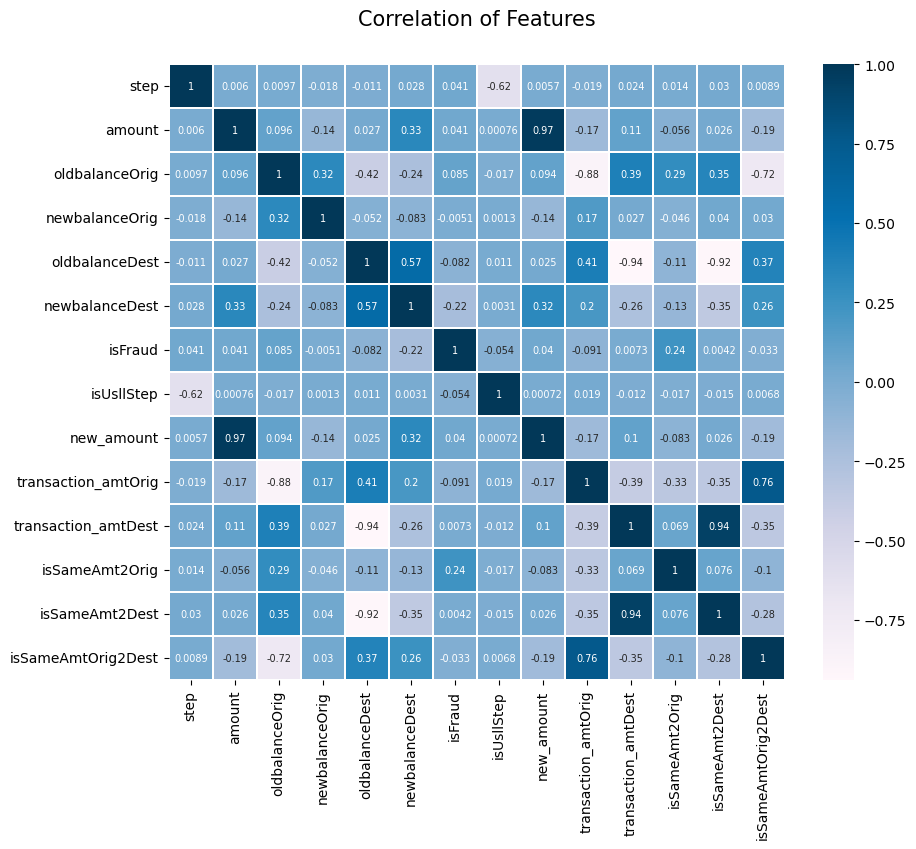

In [ ]:
# 피쳐간의 상관관계 확인
colormap = plt.cm.PuBu
plt.figure(figsize=(10, 8))
plt.title("Correlation of Features", y = 1.05, size = 15)
sns.heatmap(log_df.corr(), linewidths = 0.1, vmax = 1.0,
           square = True, cmap = colormap, linecolor = "white", annot = True, annot_kws = {"size" : 7})

In [ ]:
# 거래인별 거래금액 총액
amout_sum = log_df.groupby('nameOrig').amount.sum()
amout_sum.sort_values(ascending=False)

nameOrig
C724452879    37.52811
C2098525306   34.13316
C1741076564   29.95695
C256397271    29.61898
C925247406    29.18068
                ...   
C1971175979    0.00000
C2060908932    0.00000
C1510987794    0.00000
C539112012     0.00000
C1997645312    0.00000
Name: amount, Length: 2594715, dtype: float64

In [ ]:
# 필요 없어진 컬럼 삭제하기: amount
log_df.drop('amount', axis=1, inplace=True)
log_df

,step,type,nameOrig,oldbalanceOrig,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isUsllStep,new_amount,transaction_amtOrig,transaction_amtDest,isSameAmt2Orig,isSameAmt2Dest,isSameAmtOrig2Dest
0,1,TRANSFER,C1305486145,5.20401,0.00000,C553264065,0.00000,0.00000,1,True,5.00000,-5.00000,0.00000,True,False,False
1,1,CASH_OUT,C840083671,5.20401,0.00000,C38997010,9.96095,0.00000,1,True,5.00000,-5.00000,-10.00000,True,False,False
2,1,CASH_OUT,C905080434,9.63731,0.00000,C476402209,8.53385,10.84962,0,True,12.00000,-10.00000,2.00000,False,False,False
3,1,TRANSFER,C1670993182,6.55962,0.00000,C1100439041,10.01798,0.00000,0,True,12.00000,-7.00000,-10.00000,False,False,False
4,1,TRANSFER,C1984094095,9.29063,0.00000,C932583850,8.74321,14.81584,0,True,13.00000,-9.00000,6.00000,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2596264,699,CASH_OUT,C1915659563,11.04089,0.00000,C421781202,13.99398,14.04484,1,False,11.00000,-11.00000,0.00000,True,False,False
2596265,699,TRANSFER,C1557504343,11.99737,0.00000,C404511346,0.00000,0.00000,1,False,12.00000,-12.00000,0.00000,True,False,False
2596266,699,CASH_OUT,C1532317723,11.99737,0.00000,C446134087,0.00000,11.99737,1,False,12.00000,-12.00000,12.00000,True,True,True
2596267,699,TRANSFER,C577803442,14.83197,0.00000,C619602282,0.00000,0.00000,1,False,15.00000,-15.00000,0.00000,True,False,False


In [ ]:
####################### Hold Out CV (Data Split) #######################

In [ ]:
# conda install -c conda-forge openblas --y

In [ ]:
# 언더샘플링, 오버샘플링 등을 적용하기 전에 데이터 나누기
from sklearn.model_selection import train_test_split

# Hold-Out 기법으로 데이터셋을 분리. (df_train, test)
## stratify=True 원본 데이터에서 label의 비율를 맞추어서 train test set으로 나누어주는 기능을 사용
train, test = train_test_split(log_df, train_size=0.8, test_size=0.2, 
                                  stratify=log_df['isFraud'], random_state=42)

# 전체 데이터의 타겟비율과 비슷하게 골고루 분리 되었음을 확인..
target='isFraud'

print("Train target distribution:\n", train[target].value_counts(normalize=True), "\n")
print("Test target distribution:\n", test[target].value_counts(normalize=True))

Train target distribution:
 0   0.99703
1   0.00297
Name: isFraud, dtype: float64 

Test target distribution:
 0   0.99703
1   0.00297
Name: isFraud, dtype: float64


In [ ]:
# Hold-Out 기법으로 데이터셋을 분리. (train, val)
train, val = train_test_split(train, train_size=0.8, test_size=0.2,
                             stratify=train['isFraud'], random_state=42)

# EDA 및 피쳐 엔지니어링 종료 후 피쳐와 타겟분리.
X_train, y_train = train.drop(columns=[target]), train[target]
X_val, y_val = val.drop(columns=[target]), val[target]
X_test, y_test = test.drop(columns=[target]), test[target]

train.shape, val.shape, test.shape

((1661612, 16), (415403, 16), (519254, 16))

In [ ]:
X_train.shape, y_train.shape, X_val.shape, y_val.shape, X_test.shape, y_test.shape

((1661612, 15), (1661612,), (415403, 15), (415403,), (519254, 15), (519254,))

In [ ]:
############## 기준모델 생성 ################

In [ ]:
# 분류 기준모델, 최빈값 추출 (언더&오버 샘플링 전)
from sklearn.metrics import accuracy_score

# 훈련세트
major = y_train.mode()[0]
y_pred_t = [major] * len(y_train)

# 검증세트
y_pred_v = [major] * len(y_val)

print("훈련세트 정확도: ", accuracy_score(y_train, y_pred_t))
print("검증세트 정확도: ", accuracy_score(y_val, y_pred_v))

훈련세트 정확도:  0.9970275852605783
검증세트 정확도:  0.9970269834353628


In [ ]:
## 데이터 불균형(99:1)으로 인해 높은 정확도가 나온다. 언더샘플링 혹은 오버샘플링이 필요하다.
## 혼동행렬확인 필수.

In [ ]:
!pip install category_encoders

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from category_encoders import OrdinalEncoder
from sklearn.impute import SimpleImputer 
from sklearn.pipeline import make_pipeline

pipe = make_pipeline(
    OrdinalEncoder(), 
    SimpleImputer(), 
    RandomForestClassifier(n_jobs=-1, random_state=42, oob_score=True)
)

pipe.fit(X_train, y_train)
print('검증 정확도', pipe.score(X_val, y_val))

검증 정확도 0.9991454081939707


In [ ]:
# classification_report 확인
from sklearn.metrics import classification_report

y_pred = pipe.predict(X_val)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00    414168
           1       0.97      0.74      0.84      1235

    accuracy                           1.00    415403
   macro avg       0.98      0.87      0.92    415403
weighted avg       1.00      1.00      1.00    415403



Text(0.5, 1.0, 'Confusion matrix, n = 415403')

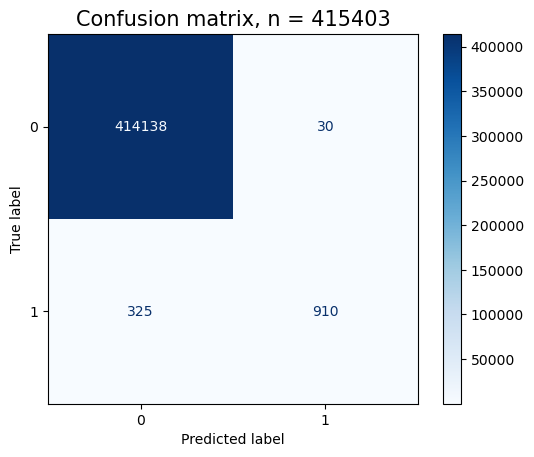

In [ ]:
# 심각성을 알 수 있다.
# 0으로 예측했는데 실제 0인 값들이 많다. -> 데이터의 불균형이 초래한 문제.
from sklearn.metrics import plot_confusion_matrix

fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe, X_val, y_val,
                            cmap=plt.cm.Blues,
                            ax=ax);

plt.title(f'Confusion matrix, n = {len(y_val)}', fontsize=15)

ROC-AUC: 0.9943279622804788


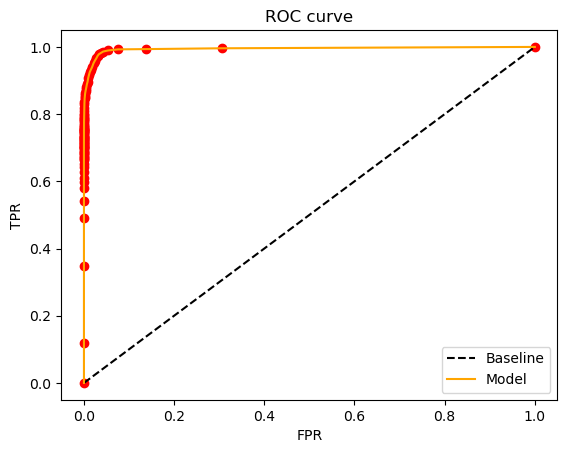

,tpr,fpr,thresholds
0,0.00000,0.00000,2.00000
1,0.11741,0.00000,1.00000
2,0.34737,0.00000,0.99000
3,0.48988,0.00000,0.98000
4,0.54089,0.00000,0.97000
...,...,...,...
88,0.98947,0.05332,0.04000
89,0.99271,0.07597,0.03000
90,0.99352,0.13804,0.02000
91,0.99595,0.30535,0.01000


In [ ]:
# ROC curve 너무나완벽한....ㅠ
from sklearn.metrics import roc_curve, roc_auc_score

y_pred_proba = pipe.predict_proba(X_val)[:, 1]
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)

print("ROC-AUC:", roc_auc_score(y_val, y_pred_proba))

baseline_fpr, baseline_tpr, _ = roc_curve(y_val, [0] * len(y_val))
fpr, tpr, thresholds = roc_curve(y_val, y_pred_proba)
tmp = pd.DataFrame({'tpr':tpr, 'fpr':fpr, 'thresholds': thresholds})
plt.plot(
    baseline_fpr, baseline_tpr, linestyle="--", color="black", label="Baseline"
)
    

plt.scatter(fpr, tpr, color='red')
plt.plot(fpr, tpr, color='orange', label="Model")
plt.legend()
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

tmp

In [ ]:
############### Oversampling + Undersapmling #################

In [ ]:
# !pip install imblearn

In [ ]:
#!pip uninstall scikit-learn -y
#!pip install sklearn

In [ ]:
#!conda update scikit-learn -y

In [ ]:
#!pip3 install imbalanced-learn

In [ ]:
#!conda update --all -y

In [ ]:
from imblearn.combine import SMOTEENN

encoder = OrdinalEncoder()
X_train_encoded = encoder.fit_transform(X_train)
X_val_encoded = encoder.transform(X_val)
X_test_encoded = encoder.transform(X_test)

X_train_sampled, y_train_sampled = SMOTEENN(random_state=42).fit_resample(
    X_train_encoded, y_train
)



In [ ]:
print("Before: \n", y_train.value_counts())
print("After: \n", y_train_sampled.value_counts())

Before: 
 0    1656673
1       4939
Name: isFraud, dtype: int64
After: 
 1    1498407
0    1339373
Name: isFraud, dtype: int64


In [ ]:
# 분류 기준모델, 최빈값 추출 (언더&오버 샘플링 후)
from sklearn.metrics import accuracy_score

# 훈련세트
major = y_train_sampled.mode()[0]
y_pred_t = [major] * len(y_train_sampled)

# 검증세트
y_pred_v = [major] * len(y_val)

print("훈련세트 정확도: ", accuracy_score(y_train_sampled, y_pred_t))
print("검증세트 정확도: ", accuracy_score(y_val, y_pred_v))

훈련세트 정확도:  0.5280208472820304
검증세트 정확도:  0.0029730165646372317


In [ ]:
################### 하이퍼 파라미터 튜닝 -> randomCV or 베이지안 튜닝  ###################

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
from sklearn.pipeline import Pipeline

pipe = make_pipeline(
    SimpleImputer(),
    OrdinalEncoder(),
    RandomForestClassifier(n_jobs=-1, random_state=42, oob_score=True)
)

dists = {
    'randomforestclassifier__n_estimators': randint(50, 200), 
    'randomforestclassifier__max_depth': randint(3, 15), 
    'randomforestclassifier__max_features': uniform(0, 1)
}

clf = RandomizedSearchCV(
    pipe, 
    param_distributions=dists, 
    n_iter=3, 
    cv=3, 
    scoring='f1',  
    verbose=True,
    n_jobs=-1
)

clf.fit(X_train_sampled, y_train_sampled)
print('최적 하이퍼파라미터: ', clf.best_params_)

Fitting 3 folds for each of 3 candidates, totalling 9 fits
최적 하이퍼파라미터:  {'randomforestclassifier__max_depth': 5, 'randomforestclassifier__max_features': 0.14842721942395876, 'randomforestclassifier__n_estimators': 124}


In [ ]:
# pipe.named_steps['randomforestclassifier'].oob_score_

AttributeError: 'RandomForestClassifier' object has no attribute 'oob_score_'

In [ ]:
pipe.named_steps['randomforestclassifier']

RandomForestClassifier(n_jobs=-1, oob_score=True, random_state=42)

In [ ]:
from sklearn.metrics import f1_score

# 위에서 찾은 최적 하이퍼파라미터를 적용한 모델 생성.  
pipe = clf.best_estimator_

# 위 최적 모델에 훈련/검증 데이터 넣고 스코어 추출. 
y_train_pred = pipe.predict(X_train_sampled)
y_val_pred = pipe.predict(X_val_encoded)

print('훈련 f1 score: ', f1_score(y_train_sampled, y_train_pred))
print('검증 f1 score: ', f1_score(y_val, y_val_pred))

훈련 f1 score:  0.9835307733554884
검증 f1 score:  0.14102942043511585


In [ ]:
y_pred = pipe.predict(X_val_encoded)
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.96      0.98    414168
           1       0.08      0.97      0.14      1235

    accuracy                           0.96    415403
   macro avg       0.54      0.97      0.56    415403
weighted avg       1.00      0.96      0.98    415403



In [ ]:
### XGB ###

In [ ]:
!pip install xgboost

  Using cached xgboost-1.7.1-py3-none-macosx_10_15_x86_64.macosx_11_0_x86_64.macosx_12_0_x86_64.whl (1.8 MB)


In [ ]:
from xgboost import XGBClassifier

model = XGBClassifier(
    objective="binary:logistic",
    eval_metric="auc",
    n_estimators=1000,
    random_state=42,
    n_jobs=-1,
    max_depth=5,
    learning_rate=0.1,
    scale_pos_weight=(y_train_sampled == 0).sum() / (y_train_sampled == 1).sum(),
)

In [ ]:
watchlist = [(X_train_sampled, y_train_sampled), (X_val_encoded, y_val)]

model.fit(
    X_train_sampled,
    y_train_sampled,
    eval_set=watchlist,
    early_stopping_rounds=50,  # 50 rounds 동안 성능 개선이 없으면 학습을 중지합니다.
)

[0]	validation_0-auc:0.99848	validation_1-auc:0.99268
[1]	validation_0-auc:0.99859	validation_1-auc:0.99370
[2]	validation_0-auc:0.99861	validation_1-auc:0.99366
[3]	validation_0-auc:0.99862	validation_1-auc:0.99398
[4]	validation_0-auc:0.99861	validation_1-auc:0.99399
[5]	validation_0-auc:0.99862	validation_1-auc:0.99399
[6]	validation_0-auc:0.99871	validation_1-auc:0.99410
[7]	validation_0-auc:0.99896	validation_1-auc:0.99436
[8]	validation_0-auc:0.99911	validation_1-auc:0.99445
[9]	validation_0-auc:0.99920	validation_1-auc:0.99463
[10]	validation_0-auc:0.99932	validation_1-auc:0.99487
[11]	validation_0-auc:0.99937	validation_1-auc:0.99415
[12]	validation_0-auc:0.99937	validation_1-auc:0.99494
[13]	validation_0-auc:0.99936	validation_1-auc:0.99420
[14]	validation_0-auc:0.99937	validation_1-auc:0.99421
[15]	validation_0-auc:0.99938	validation_1-auc:0.99424
[16]	validation_0-auc:0.99939	validation_1-auc:0.99427
[17]	validation_0-auc:0.99941	validation_1-auc:0.99428
[18]	validation_0-au

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric='auc', feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=5, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=1000, n_jobs=-1,
              num_parallel_tree=1, predictor='auto', random_state=42, ...)

In [ ]:
print("검증 정확도", model.score(X_val_encoded, y_val))

print(classification_report(
        y_val, model.predict(X_val_encoded, iteration_range=(0, model.best_iteration))
    )
)

검증 정확도 0.9939721186414157
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    414168
           1       0.31      0.89      0.46      1235

    accuracy                           0.99    415403
   macro avg       0.66      0.94      0.73    415403
weighted avg       1.00      0.99      1.00    415403



Text(0.5, 1.0, 'Confusion matrix, n = 415403')

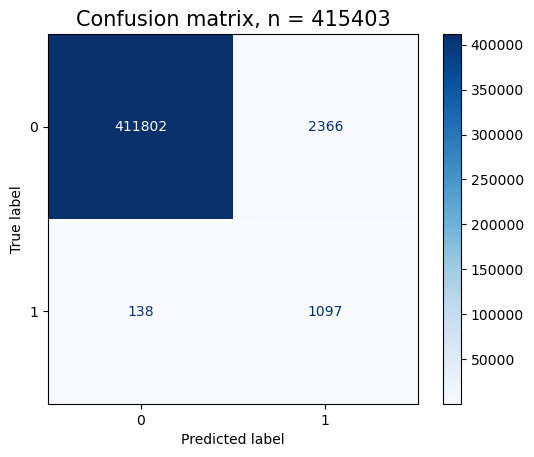

In [ ]:
fig, ax = plt.subplots()
pcm = plot_confusion_matrix(model, X_val_encoded, y_val,
                            cmap=plt.cm.Blues,
                            ax=ax);

plt.title(f'Confusion matrix, n = {len(y_val)}', fontsize=15)

In [ ]:
################### test set 검증  ###################

In [ ]:
y_pred = model.predict(X_test_encoded)

print('테스트 f1 score: ', f1_score(y_test, y_pred, average='binary'))
print(classification_report(y_test, y_pred))

테스트 f1 score:  0.46725185685347737
              precision    recall  f1-score   support

           0       1.00      0.99      1.00    517711
           1       0.32      0.90      0.47      1543

    accuracy                           0.99    519254
   macro avg       0.66      0.95      0.73    519254
weighted avg       1.00      0.99      1.00    519254



ROC-AUC: 0.9954057448354097


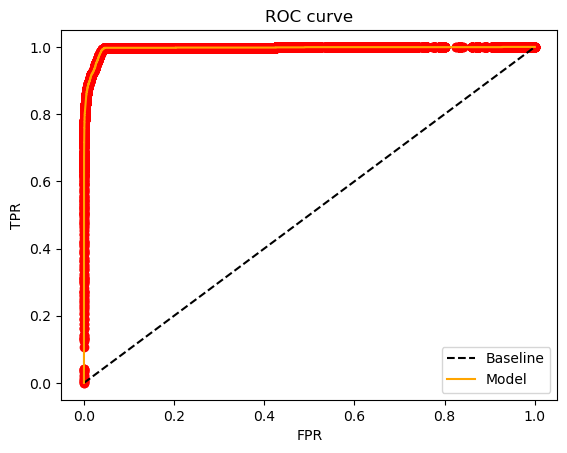

,tpr,fpr,thresholds
0,0.00000,0.00000,1.97993
1,0.00065,0.00000,0.97993
2,0.00389,0.00000,0.97547
3,0.00583,0.00000,0.97545
4,0.00713,0.00000,0.97537
...,...,...,...
46561,1.00000,0.99998,0.00948
46562,1.00000,0.99998,0.00943
46563,1.00000,0.99998,0.00943
46564,1.00000,0.99999,0.00942


In [ ]:
y_pred_proba = pipe.predict_proba(X_test_encoded)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

print("ROC-AUC:", roc_auc_score(y_test, y_pred_proba))

baseline_fpr, baseline_tpr, _ = roc_curve(y_test, [0] * len(y_test))
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
tmp = pd.DataFrame({'tpr':tpr, 'fpr':fpr, 'thresholds': thresholds})
plt.plot(
    baseline_fpr, baseline_tpr, linestyle="--", color="black", label="Baseline"
    )
    

plt.scatter(fpr, tpr, color='red')
plt.plot(fpr, tpr, color='orange', label="Model")
plt.legend()
plt.title('ROC curve')
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.show()

tmp

Text(0.5, 1.0, 'Confusion matrix, n = 519254')

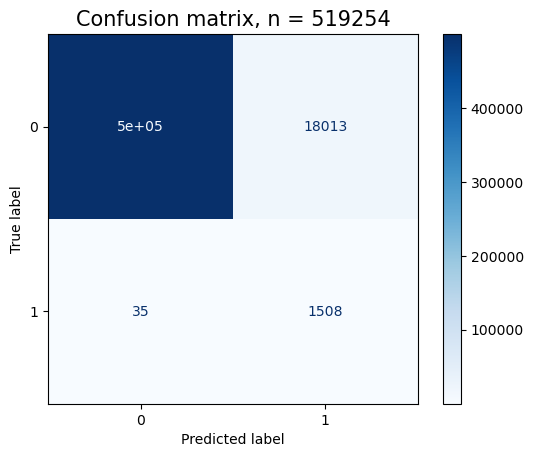

In [ ]:
fig, ax = plt.subplots()
pcm = plot_confusion_matrix(pipe, X_test_encoded, y_test,
                            cmap=plt.cm.Blues,
                            ax=ax);

plt.title(f'Confusion matrix, n = {len(y_test)}', fontsize=15)

In [ ]:
################### 순열중요도 확인  ###################

In [ ]:
pipe.named_steps

{'simpleimputer': SimpleImputer(),
 'randomforestclassifier': RandomForestClassifier(max_depth=5, max_features=0.14842721942395876,
                        n_estimators=124, n_jobs=-1, oob_score=True,
                        random_state=42)}

In [ ]:
!pip install eli5

  Using cached eli5-0.13.0-py2.py3-none-any.whl
  Using cached graphviz-0.20.1-py3-none-any.whl (47 kB)
  Using cached Jinja2-3.1.2-py3-none-any.whl (133 kB)
  Attempting uninstall: jinja2
    Found existing installation: Jinja2 2.11.3
    Uninstalling Jinja2-2.11.3:
      Successfully uninstalled Jinja2-2.11.3


In [ ]:
pipe = Pipeline([
    ('preprocessing', make_pipeline(OrdinalEncoder(), SimpleImputer())),
    ('rf', RandomForestClassifier(n_estimators=100, random_state=2, n_jobs=-1)) 
])

# 생성확인
pipe.named_steps

{'preprocessing': Pipeline(steps=[('ordinalencoder', OrdinalEncoder()),
                 ('simpleimputer', SimpleImputer())]),
 'rf': RandomForestClassifier(n_jobs=-1, random_state=2)}

In [ ]:
pipe.fit(X_train, y_train)
print('검증 정확도: ', pipe.score(X_val, y_val))

검증 정확도:  0.9991237424862122


In [ ]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import eli5
from eli5.sklearn import PermutationImportance

# permuter 정의
permuter = PermutationImportance(
    pipe.named_steps['rf'], # model
    scoring='f1', # metric
    n_iter=5, # 다른 random seed를 사용하여 5번 반복, 5번 결과를 낸 후 평균을 내겠다.
    random_state=42
)

# preprocessing 된 X_val을 사용
X_val_transformed = pipe.named_steps['preprocessing'].transform(X_val)

# 스코어를 재계산
permuter.fit(X_val_transformed, y_val);

In [ ]:
# 특성별 score 확인
feature_names = X_val.columns.tolist()

eli5.show_weights(
    permuter, 
    top=None, # top n 지정 가능, None 일 경우 모든 특성 
    feature_names=feature_names # list 형식으로 넣어야 합니다
)

# 정말 멋지다!

Weight,Feature
0.5078 ± 0.0095,isSameAmt2Orig
0.2881 ± 0.0082,newbalanceDest
0.1920 ± 0.0123,type
0.1470 ± 0.0056,oldbalanceDest
0.0895 ± 0.0094,oldbalanceOrig
0.0195 ± 0.0050,transaction_amtOrig
0.0111 ± 0.0038,step
0.0015 ± 0.0030,isUsllStep
0 ± 0.0000,nameOrig
-0.0001 ± 0.0007,newbalanceOrig


In [ ]:
#################### PDP, ICE, SHAP 설명해야함. (모델해석)####################

In [ ]:
!pip install pdpbox

  Using cached PDPbox-0.2.1-py3-none-any.whl
  Using cached matplotlib-3.1.1-cp39-cp39-macosx_10_9_x86_64.whl
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.5.3
    Uninstalling matplotlib-3.5.3:
      Successfully uninstalled matplotlib-3.5.3


In [ ]:
from pdpbox import pdp_isolate, pdp_plot
from pdpbox.pdp import pdp_interact, pdp_interact_plot
from pdpbox import pdp, get_dataset

plt.rcParams['figure.dpi'] = 144
feature = 'new_amout'

isolated = pdp_isolate(
    model=tree, 
    dataset=X_val_encoded, 
    model_features=X_val_encoded.columns, 
    feature=feature
)

ImportError: cannot import name 'pdp_isolate' from 'pdpbox' (/Users/yun/opt/anaconda3/lib/python3.9/site-packages/pdpbox/__init__.py)

In [ ]:
# PDP plot은 ICE곡선들의 평균곡선이다.
# 하나의 ICE곡선은 하나의 Sample에 대해서 관심특성을 변화시키고 그에 따른 타겟의 변화를 나타낸다.

pdp_plot(isolated
         , feature_name=feature
         , plot_lines=True # ICE plots
         , frac_to_plot=0.001 # or 10 (# 10000 val set * 0.001)
         , plot_pts_dist=True) 

plt.xlim(20000,150000);

In [ ]:
features = ['newbalanceDest', 'isSameAmt2Orig']

interaction = pdp_interact(
    model=boosting, 
    dataset=X_val_encoded,
    model_features=X_val.columns, 
    features=features
)

NameError: name 'pdp_interact' is not defined

In [ ]:
#################### 결론: 한계점, 가설 검증 내용 확인 ####################